In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Path to data
file_path_joebiden = r'C:\Users\iurch\OneDrive\DataCircle\project_data\hashtag_joebiden.csv'
file_path_donaldtrump = r'C:\Users\iurch\OneDrive\DataCircle\project_data\hashtag_donaldtrump.csv'


#Columns to read
columns_to_read = ['created_at', 'tweet_id', 'tweet','likes', 'retweet_count','user_id', 'user_screen_name', 'user_join_date', 'user_followers_count', 
                   'user_location', 'lat', 'long','country', 'continent', 'state', 'state_code','collected_at']

try:
    df_joebiden = pd.read_csv(file_path_joebiden, usecols=columns_to_read,  engine='python')
    df_donaldtrump = pd.read_csv(file_path_donaldtrump, usecols=columns_to_read, engine='python')
    print("Data loaded successfully.")
    print(df_joebiden.head())
except Exception as e:
    print("Error loading data:", e)

print(df_joebiden.head())
print(df_donaldtrump.head())


Data loaded successfully.
            created_at                tweet_id  \
0  2020-10-15 00:00:01   1.316529221557252e+18   
1  2020-10-15 00:00:18    1.31652929585929e+18   
2  2020-10-15 00:00:20  1.3165293050069524e+18   
3  2020-10-15 00:00:21  1.3165293080815575e+18   
4  2020-10-15 00:00:22   1.316529312741253e+18   

                                               tweet likes  retweet_count  \
0  #Elecciones2020 | En #Florida: #JoeBiden dice ...   0.0            0.0   
1  #HunterBiden #HunterBidenEmails #JoeBiden #Joe...   0.0            0.0   
2  @IslandGirlPRV @BradBeauregardJ @MeidasTouch T...   0.0            0.0   
3  @chrislongview Watching and setting dvr. Let’s...   0.0            0.0   
4  #censorship #HunterBiden #Biden #BidenEmails #...   1.0            0.0   

                 user_id user_screen_name       user_join_date  \
0            360666534.0  elsollatinonews  2011-08-23 15:33:45   
1            809904438.0     Biloximeemaw  2012-09-08 01:03:57   
2           

In [4]:
# Display basic information about the datasets
print("\nDonald Trump Data:")
print(df_donaldtrump.info())


Donald Trump Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971087 entries, 0 to 971086
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            971087 non-null  object 
 1   tweet_id              971073 non-null  object 
 2   tweet                 971073 non-null  object 
 3   likes                 971045 non-null  object 
 4   retweet_count         970933 non-null  float64
 5   user_id               970929 non-null  object 
 6   user_screen_name      970933 non-null  object 
 7   user_join_date        970779 non-null  object 
 8   user_followers_count  970917 non-null  object 
 9   user_location         675830 non-null  object 
 10  lat                   445702 non-null  object 
 11  long                  445705 non-null  object 
 12  country               442732 non-null  object 
 13  continent             442749 non-null  object 
 14  state                 320614 non

In [5]:
print("\nJoe Biden Data:")
print(df_joebiden.info())


Joe Biden Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777073 entries, 0 to 777072
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            777073 non-null  object 
 1   tweet_id              776995 non-null  object 
 2   tweet                 776995 non-null  object 
 3   likes                 776914 non-null  object 
 4   retweet_count         776895 non-null  float64
 5   user_id               776889 non-null  object 
 6   user_screen_name      776895 non-null  object 
 7   user_join_date        776784 non-null  object 
 8   user_followers_count  776885 non-null  object 
 9   user_location         543063 non-null  object 
 10  lat                   355284 non-null  object 
 11  long                  355284 non-null  object 
 12  country               353770 non-null  object 
 13  continent             353788 non-null  object 
 14  state                 260191 non-nu

In [6]:
# Transforming dtypes joebiden Data
# columns to datetime
parse_dates = ['created_at', 'user_join_date', 'collected_at']
for date_column in parse_dates:
    df_joebiden[date_column] = pd.to_datetime(df_joebiden[date_column], errors='coerce')

print(df_joebiden.dtypes) 

created_at              datetime64[ns]
tweet_id                        object
tweet                           object
likes                           object
retweet_count                  float64
user_id                         object
user_screen_name                object
user_join_date          datetime64[ns]
user_followers_count            object
user_location                   object
lat                             object
long                            object
country                         object
continent                       object
state                           object
state_code                      object
collected_at            datetime64[ns]
dtype: object


In [7]:
# Transforming dtypes donald trump Data
# columns to datetime
parse_dates = ['created_at', 'user_join_date', 'collected_at']
for date_column in parse_dates:
    df_donaldtrump[date_column] = pd.to_datetime(df_donaldtrump[date_column], errors='coerce')

print(df_donaldtrump.dtypes) 

created_at              datetime64[ns]
tweet_id                        object
tweet                           object
likes                           object
retweet_count                  float64
user_id                         object
user_screen_name                object
user_join_date          datetime64[ns]
user_followers_count            object
user_location                   object
lat                             object
long                            object
country                         object
continent                       object
state                           object
state_code                      object
collected_at            datetime64[ns]
dtype: object


Now we have to transform columns to the right datatype
tweet_id                        int64
tweet                           str
likes                           float64
retweet_count                  float64
user_id                         object
user_name                       object
user_join_date          datetime64[ns]
user_followers_count            object
user_location                   object
lat                             object
long                            object
country                         object
continent                       object
state                           object
state_code                      object

In [8]:
# Convert 'tweet_id' to numeric, invalid parsing will be set as NaN
df_joebiden['tweet_id_numeric'] = pd.to_numeric(df_joebiden['tweet_id'], errors='coerce')
# Trump Tweet_ID
df_donaldtrump['tweet_id_numeric'] = pd.to_numeric(df_donaldtrump['tweet_id'], errors='coerce')

In [9]:
# Drop rows where 'tweet_id_numeric' is NaN 
df_joebiden = df_joebiden.dropna(subset=['tweet_id_numeric'])
# Trump Tweet_ID
df_donaldtrump = df_donaldtrump.dropna(subset=['tweet_id_numeric'])

In [10]:
# Now convert 'tweet_id_numeric' to 'int64'
df_joebiden['tweet_id_numeric'] = df_joebiden['tweet_id_numeric'].astype('int64')
# Trump Tweet_ID
df_donaldtrump['tweet_id_numeric'] = df_donaldtrump['tweet_id_numeric'].astype('int64')

In [11]:
#Check
df_joebiden['tweet_id_numeric'].info
df_donaldtrump['tweet_id_numeric'].info

<bound method Series.info of 0         1316529221557252096
1         1316529222748430336
2         1316529228091846912
3         1316529227471237120
4         1316529252301451264
                 ...         
971082    1325588843488276480
971083    1325588866045194240
971084    1325588885515227136
971085    1325588892905402368
971086    1325588894482534400
Name: tweet_id_numeric, Length: 970926, dtype: int64>

In [12]:
# Drop the old 'tweet_id' column 
df_joebiden = df_joebiden.drop(columns=['tweet_id']).rename(columns={'tweet_id_numeric': 'tweet_id'})
df_donaldtrump = df_donaldtrump.drop(columns=['tweet_id']).rename(columns={'tweet_id_numeric': 'tweet_id'})

In [13]:
#Cheking duplicates
df_joebiden['tweet_id'].duplicated().sum()

np.int64(1856)

In [14]:
df_joebiden = df_joebiden.drop_duplicates(subset=['tweet_id'])

In [15]:
df_donaldtrump['tweet_id'].duplicated().sum()

np.int64(1347)

In [16]:
df_donaldtrump = df_donaldtrump.drop_duplicates(subset=['tweet_id'])
df_donaldtrump['tweet_id'].duplicated().sum()

np.int64(0)

In [17]:
#Converting 'tweet' column to string format
df_joebiden['tweet'] = df_joebiden['tweet'].astype(str)
df_donaldtrump['tweet'] = df_donaldtrump['tweet'].astype(str)

In [18]:
df_joebiden['tweet'].duplicated().sum()

np.int64(6649)

In [19]:
df_donaldtrump['tweet'].duplicated().sum()

np.int64(11043)

In [20]:
# Drop duplicates based on 'tweet' column for the entire DataFrame
df_joebiden = df_joebiden.drop_duplicates(subset=['tweet'])
df_donaldtrump = df_donaldtrump.drop_duplicates(subset=['tweet'])

In [21]:
#Likes column cleaning

# Convert 'likes' to numeric, invalid parsing will be set as NaN
df_joebiden['likes_numeric'] = pd.to_numeric(df_joebiden['likes'], errors='coerce')
# Trump likes
df_donaldtrump['likes_numeric'] = pd.to_numeric(df_donaldtrump['likes'], errors='coerce')

In [22]:
# Drop rows where 'likes_numeric' is NaN 
df_joebiden = df_joebiden.dropna(subset=['likes_numeric'])
# Trump Tweet_ID
df_donaldtrump = df_donaldtrump.dropna(subset=['likes_numeric'])

In [23]:
# Now convert 'likes_numeric' to 'float64'
# Use .loc[] to avoid SettingWithCopyWarning
df_joebiden.loc[:, 'likes_numeric'] = df_joebiden['likes_numeric'].astype('float64')
#Trump likes column
df_donaldtrump.loc[:, 'likes_numeric'] = df_donaldtrump['likes_numeric'].astype('float64')


In [24]:
#Check
df_joebiden['likes_numeric'].info
df_donaldtrump['likes_numeric'].info

<bound method Series.info of 0           0.0
1          26.0
2           2.0
3           0.0
4           4.0
          ...  
971082      0.0
971083      4.0
971084     25.0
971085      0.0
971086    105.0
Name: likes_numeric, Length: 958528, dtype: float64>

In [25]:
# Drop the old 'likes' column 
df_joebiden = df_joebiden.drop(columns=['likes']).rename(columns={'likes_numeric': 'likes'})
df_donaldtrump = df_donaldtrump.drop(columns=['likes']).rename(columns={'likes_numeric': 'likes'})

In [26]:
# Check how many duplicate rows there are based on 'tweet_id' and 'likes'
num_duplicates = df_joebiden.duplicated(subset=['tweet_id', 'likes']).sum()
print(num_duplicates)


0


In [27]:
# Check how many duplicate rows there are based on 'tweet_id' and 'likes'
num_duplicates = df_donaldtrump.duplicated(subset=['tweet_id', 'likes']).sum()
print(num_duplicates)


0


In [28]:
print(df_joebiden.columns)

Index(['created_at', 'tweet', 'retweet_count', 'user_id', 'user_screen_name',
       'user_join_date', 'user_followers_count', 'user_location', 'lat',
       'long', 'country', 'continent', 'state', 'state_code', 'collected_at',
       'tweet_id', 'likes'],
      dtype='object')


In [29]:
nan_likes_joe_biden = df_joebiden['likes'].isna().sum()
nan_likes_joe_biden

np.int64(0)

In [30]:
nan_likes_trump = df_donaldtrump['likes'].isna().sum()
nan_likes_trump

np.int64(0)

In [31]:
#Retweet column

nan_retweets_biden = df_joebiden['retweet_count'].isna().sum()
nan_retweets_biden

np.int64(0)

In [32]:
nan_retweets_trump = df_donaldtrump['retweet_count'].isna().sum()
nan_retweets_trump

np.int64(0)

In [33]:
# Check how many duplicate rows there are based on 'tweet_id' and 'retweet'
retweet_duplicates_trump = df_donaldtrump.duplicated(subset=['tweet_id', 'retweet_count']).sum()
print(retweet_duplicates_trump)

0


In [34]:
# Check how many duplicate rows there are based on 'tweet_id' and 'retweet'
retweet_duplicates_biden = df_joebiden.duplicated(subset=['tweet_id', 'retweet_count']).sum()
print(retweet_duplicates_biden)

0


Tweets frequency for each candidate over time period

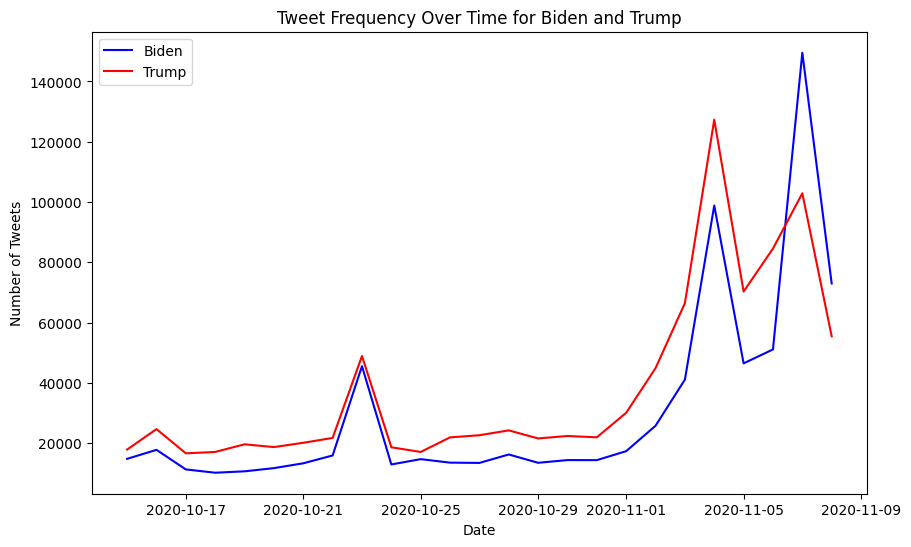

In [35]:
import matplotlib.pyplot as plt

# Group by date and count tweets for Biden
tweet_frequency_biden = df_joebiden.groupby(df_joebiden['created_at'].dt.date)['tweet_id'].count()

# Group by date and count tweets for Trump
tweet_frequency_trump = df_donaldtrump.groupby(df_donaldtrump['created_at'].dt.date)['tweet_id'].count()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(tweet_frequency_biden.index, tweet_frequency_biden.values, label='Biden', color='blue')
plt.plot(tweet_frequency_trump.index, tweet_frequency_trump.values, label='Trump', color='red')

plt.title('Tweet Frequency Over Time for Biden and Trump')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')

plt.legend()

plt.show()


User activity 

In [36]:
# Tweets per user for biden
user_activity_biden = df_joebiden.groupby('user_id')['tweet_id'].count().sort_values(ascending=False)

# Display top 10 most active users
print(user_activity_biden.head(10))

user_id
1.2449822077033308e+18    1259
74268619.0                1163
874258472.0               1059
23954327.0                 922
1.0247779165409649e+18     560
755798016.0                517
1.2423507214643364e+18     486
1.304249338504401e+18      476
54361678.0                 456
386395062.0                442
Name: tweet_id, dtype: int64


In [37]:
# Tweets per user for trump
user_activity_trump = df_donaldtrump.groupby('user_id')['tweet_id'].count().sort_values(ascending=False)

# Display top 10 most active users
print(user_activity_trump.head(10))

user_id
74268619.0                1352
40173650.0                1324
4132841.0                  980
386395062.0                959
23954327.0                 921
1.0119529969079624e+18     895
208607949.0                852
1.1549521668152812e+18     785
1.1997681328327762e+18     760
9.751178113653596e+17      709
Name: tweet_id, dtype: int64


In [38]:
df_joebiden.info()

<class 'pandas.core.frame.DataFrame'>
Index: 768380 entries, 0 to 777072
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   created_at            768380 non-null  datetime64[ns]
 1   tweet                 768380 non-null  object        
 2   retweet_count         768380 non-null  float64       
 3   user_id               768380 non-null  object        
 4   user_screen_name      768380 non-null  object        
 5   user_join_date        768274 non-null  datetime64[ns]
 6   user_followers_count  768274 non-null  object        
 7   user_location         537655 non-null  object        
 8   lat                   351707 non-null  object        
 9   long                  351707 non-null  object        
 10  country               350196 non-null  object        
 11  continent             350214 non-null  object        
 12  state                 257649 non-null  object        
 13  stat

In [39]:
# Columns to convert to numeric
columns_to_convert = ['user_id', 'user_followers_count', 'lat', 'long']
#Biden
df_joebiden['user_id_numeric'] = pd.to_numeric(df_joebiden['user_id'], errors='coerce')
df_joebiden['user_followers_count_numeric'] = pd.to_numeric(df_joebiden['user_followers_count'], errors='coerce')
df_joebiden['lat_numeric'] = pd.to_numeric(df_joebiden['lat'], errors='coerce')
df_joebiden['long_numeric'] = pd.to_numeric(df_joebiden['long'], errors='coerce')
# Trump 
df_donaldtrump['user_id_numeric'] = pd.to_numeric(df_donaldtrump['user_id'], errors='coerce')
df_donaldtrump['user_followers_count_numeric'] = pd.to_numeric(df_donaldtrump['user_followers_count'], errors='coerce')
df_donaldtrump['lat_numeric'] = pd.to_numeric(df_donaldtrump['lat'], errors='coerce')
df_donaldtrump['long_numeric'] = pd.to_numeric(df_donaldtrump['long'], errors='coerce')

In [40]:
# Drop rows where numeric is NaN 
#Biden
df_joebiden = df_joebiden.dropna(subset=['user_id_numeric'])
df_joebiden = df_joebiden.dropna(subset=['user_followers_count_numeric'])
df_joebiden = df_joebiden.dropna(subset=['lat_numeric'])
df_joebiden = df_joebiden.dropna(subset=['long_numeric'])

# Trump 
df_donaldtrump = df_donaldtrump.dropna(subset=['user_id_numeric'])
df_donaldtrump = df_donaldtrump.dropna(subset=['user_followers_count_numeric'])
df_donaldtrump = df_donaldtrump.dropna(subset=['lat_numeric'])
df_donaldtrump = df_donaldtrump.dropna(subset=['long_numeric'])

In [41]:
#Converting to int/float
#Biden
df_joebiden['user_id_numeric'] = df_joebiden['user_id_numeric'].astype('int64')
df_joebiden['user_followers_count_numeric'] = df_joebiden['user_followers_count_numeric'].astype('float64')
df_joebiden['lat_numeric'] = df_joebiden['lat_numeric'].astype('float64')
df_joebiden['long_numeric'] = df_joebiden['long_numeric'].astype('float64')

#Trump
df_donaldtrump['user_id_numeric'] = df_donaldtrump['user_id_numeric'].astype('int64')
df_donaldtrump['user_followers_count_numeric'] = df_donaldtrump['user_followers_count_numeric'].astype('float64')
df_donaldtrump['lat_numeric'] = df_donaldtrump['lat_numeric'].astype('float64')
df_donaldtrump['long_numeric'] = df_donaldtrump['long_numeric'].astype('float64')



In [42]:
# Drop the old column 
df_joebiden = df_joebiden.drop(columns=['user_id']).rename(columns={'user_id_numeric': 'user_id'})
df_joebiden = df_joebiden.drop(columns=['user_followers_count']).rename(columns={'user_followers_count_numeric': 'user_followers_count'})
df_joebiden = df_joebiden.drop(columns=['lat']).rename(columns={'lat_numeric': 'lat'})
df_joebiden = df_joebiden.drop(columns=['long']).rename(columns={'long_numeric': 'long'})

#Trump
df_donaldtrump = df_donaldtrump.drop(columns=['user_id']).rename(columns={'user_id_numeric': 'user_id'})
df_donaldtrump = df_donaldtrump.drop(columns=['user_followers_count']).rename(columns={'user_followers_count_numeric': 'user_followers_count'})
df_donaldtrump = df_donaldtrump.drop(columns=['lat']).rename(columns={'lat_numeric': 'lat'})
df_donaldtrump = df_donaldtrump.drop(columns=['long']).rename(columns={'long_numeric': 'long'})



In [43]:
df_joebiden.info()

<class 'pandas.core.frame.DataFrame'>
Index: 351707 entries, 0 to 777070
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   created_at            351707 non-null  datetime64[ns]
 1   tweet                 351707 non-null  object        
 2   retweet_count         351707 non-null  float64       
 3   user_screen_name      351707 non-null  object        
 4   user_join_date        351707 non-null  datetime64[ns]
 5   user_location         351707 non-null  object        
 6   country               350196 non-null  object        
 7   continent             350214 non-null  object        
 8   state                 257649 non-null  object        
 9   state_code            242153 non-null  object        
 10  collected_at          4 non-null       datetime64[ns]
 11  tweet_id              351707 non-null  int64         
 12  likes                 351707 non-null  float64       
 13  user

NaNs and duplicates in user_id's

In [44]:
na_user_id_biden = df_joebiden['user_id'].isna().sum()
na_user_id_biden

np.int64(0)

In [45]:
na_user_id_trump = df_donaldtrump['user_id'].isna().sum()
na_user_id_trump

np.int64(0)

In [46]:
# Check how many duplicate rows there are based on 'user_id' and 'tweet_id'
duplicates_trump_user_id = df_donaldtrump.duplicated(subset=['user_id', 'tweet_id']).sum()
print(duplicates_trump_user_id)

#usei_id vs tweet

0


In [47]:
duplicates_biden_user_id = df_joebiden.duplicated(subset=['user_id', 'tweet_id']).sum()
print(duplicates_biden_user_id)

0


User folowers NaN

In [48]:
na_user_followers_biden = df_joebiden['user_followers_count'].isna().sum()
na_user_followers_biden

np.int64(0)

In [49]:
na_user_followers_trump = df_donaldtrump['user_followers_count'].isna().sum()
na_user_followers_trump

np.int64(0)

In [50]:
df_joebiden['user_followers_count'].describe()

count    3.517070e+05
mean     5.168159e+04
std      5.219310e+05
min      0.000000e+00
25%      1.350000e+02
50%      6.970000e+02
75%      3.141000e+03
max      1.629713e+07
Name: user_followers_count, dtype: float64

Converting object columns to strings

In [51]:
df_joebiden['user_location'] = df_joebiden['user_location'].fillna('').astype(str)
df_joebiden['country'] = df_joebiden['country'].fillna('').astype(str)
df_joebiden['continent'] = df_joebiden['continent'].fillna('').astype(str)
df_joebiden['state'] = df_joebiden['state'].fillna('').astype(str)
df_joebiden['state_code'] = df_joebiden['state_code'].fillna('').astype(str)
df_joebiden['user_screen_name'] = df_joebiden['user_screen_name'].fillna('').astype(str)
df_joebiden['tweet'] = df_joebiden['tweet'].fillna('').astype(str)

In [52]:
df_donaldtrump['user_location'] = df_donaldtrump['user_location'].astype(str)
df_donaldtrump['country'] = df_donaldtrump['country'].astype(str)
df_donaldtrump['continent'] = df_donaldtrump['continent'].astype(str)
df_donaldtrump['state'] = df_donaldtrump['state'].astype(str)
df_donaldtrump['state_code'] = df_donaldtrump['state_code'].astype(str)
df_donaldtrump['user_screen_name'] = df_donaldtrump['user_screen_name'].astype(str)
df_donaldtrump['tweet'] = df_donaldtrump['tweet'].astype(str)

In [53]:
df_donaldtrump.dtypes

created_at              datetime64[ns]
tweet                           object
retweet_count                  float64
user_screen_name                object
user_join_date          datetime64[ns]
user_location                   object
country                         object
continent                       object
state                           object
state_code                      object
collected_at            datetime64[ns]
tweet_id                         int64
likes                          float64
user_id                          int64
user_followers_count           float64
lat                            float64
long                           float64
dtype: object

In [54]:
print(df_joebiden['user_location'].apply(lambda x: isinstance(x, str)).all())


True


In [55]:
print(df_joebiden['tweet'].apply(lambda x: isinstance(x, str)).all())


True


In [56]:
print(df_joebiden['user_screen_name'].apply(lambda x: isinstance(x, str)).all())


True


In [57]:
print(df_joebiden['country'].apply(lambda x: isinstance(x, str)).all())


True


Column user_screen_name exploration. Joe Biden

In [58]:
biden_user_screen_name_na = df_joebiden['user_screen_name'].isna().sum()
biden_user_screen_name_na

np.int64(0)

In [59]:
df_user_counts = df_joebiden['user_screen_name'].value_counts()
df_user_counts

user_screen_name
steveziegenbus2    1259
revue2presse       1163
JournalistJG       1059
Hotpage_News        922
tismdude            486
                   ... 
RedPepperUG           1
IAmSeanLassiter       1
cbillinson            1
CarlosValenz15        1
InMyLane537           1
Name: count, Length: 131544, dtype: int64

In [60]:
trump_user_screen_name_na = df_donaldtrump['user_screen_name'].isna().sum()
trump_user_screen_name_na

np.int64(0)

In [61]:
# Group by user_screen_name and aggregate, including the country
biden_top_users = df_joebiden.groupby('user_screen_name').agg(
    tweet_count=('tweet_id', 'count'),  # Count number of tweets per user
    max_followers=('user_followers_count', 'max'),  # Get the maximum follower count per user
    country=('country', 'first')  # Retain the first occurrence of country
).reset_index()

# Sort by maximum followers in descending order
biden_top_users = biden_top_users.sort_values(by='max_followers', ascending=False)

# Select the top 20 users with the most followers
biden_top_20_users = biden_top_users.head(20)

# Display the top 20 users by their max followers and tweet count, including country
print(biden_top_20_users[['user_screen_name', 'max_followers', 'tweet_count', 'country']])

       user_screen_name  max_followers  tweet_count                   country
86405          detikcom     16297130.0           77                 Indonesia
111297             ndtv     13940930.0           32                     India
11314      CGTNOfficial     13783747.0           10                     China
126561     timesofindia     13216354.0           10                     India
83785         cnnarabic     12034151.0           39      United Arab Emirates
73955            aajtak     11351589.0           82                     India
1432            ABPNews     10563327.0          192                     India
130977            youm7      9635394.0            5                     Egypt
42066        MarceloTas      9423063.0            2                    Brazil
127690        tvOneNews      8882196.0            7                 Indonesia
110596   muyinteresante      8398408.0            1                     Spain
102724        kompascom      7863661.0           13             

detikcom – This is a popular Indonesian online news portal.
ndtv – NDTV (New Delhi Television) is one of India's leading news networks.
CGTNOfficial – CGTN (China Global Television Network) is a Chinese international English-language news channel.
timesofindia – The Times of India is one of the largest English-language daily newspapers in India.
cnnarabic – The Arabic version of CNN, a well-known international news network.
aajtak – Aaj Tak is a leading Hindi news channel in India.
ABPNews – Another major Hindi news network in India.
MarceloTas – Marcelo Tas is a Brazilian TV host, journalist, and author.
HaifaWehbe – Haifa Wehbe is a famous Lebanese singer and actress.
PDChina – People's Daily China is an official newspaper of the Communist Party of China.
PerezHilton – Perez Hilton is a well-known American celebrity blogger and media personality.

In [62]:
# Sort by tweet count in descending order
biden_top_users_sorted_by_tweets = biden_top_20_users.sort_values(by='tweet_count', ascending=False)

# Display the sorted data
print(biden_top_users_sorted_by_tweets[['user_screen_name', 'max_followers', 'tweet_count', 'country']])


       user_screen_name  max_followers  tweet_count                   country
1432            ABPNews     10563327.0          192                     India
73955            aajtak     11351589.0           82                     India
125495        the_hindu      6505330.0           81                     India
86405          detikcom     16297130.0           77                 Indonesia
83785         cnnarabic     12034151.0           39      United Arab Emirates
111297             ndtv     13940930.0           32                     India
102724        kompascom      7863661.0           13                 Indonesia
94932          htTweets      7808110.0           11                     India
126561     timesofindia     13216354.0           10                     India
11314      CGTNOfficial     13783747.0           10                     China
112437              ntv      7491484.0            9                    Turkey
127690        tvOneNews      8882196.0            7             

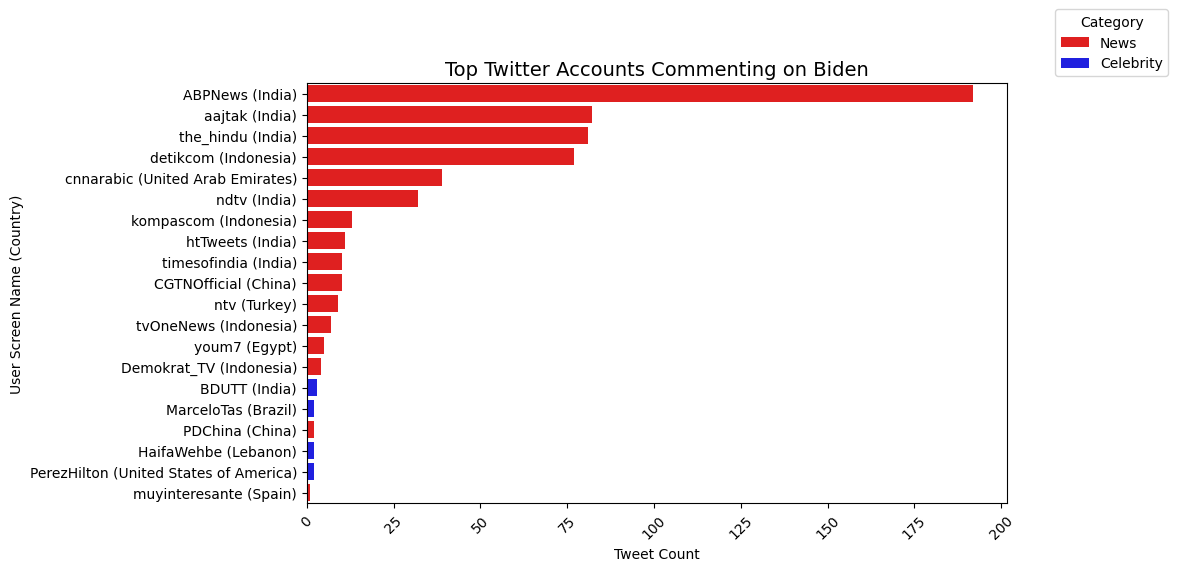

       user_screen_name  max_followers  tweet_count                   country
1432            ABPNews     10563327.0          192                     India
73955            aajtak     11351589.0           82                     India
125495        the_hindu      6505330.0           81                     India
86405          detikcom     16297130.0           77                 Indonesia
83785         cnnarabic     12034151.0           39      United Arab Emirates
111297             ndtv     13940930.0           32                     India
102724        kompascom      7863661.0           13                 Indonesia
94932          htTweets      7808110.0           11                     India
126561     timesofindia     13216354.0           10                     India
11314      CGTNOfficial     13783747.0           10                     China
112437              ntv      7491484.0            9                    Turkey
127690        tvOneNews      8882196.0            7             

In [63]:
# Combine user_screen_name and country into a single column for the x-axis
biden_top_users_sorted_by_tweets['user_country'] = (
    biden_top_users_sorted_by_tweets['user_screen_name'] + 
    ' (' + biden_top_users_sorted_by_tweets['country'] + ')'
)

# Define news providers and celebrities
news_providers = ['ABPNews', 'aajtak', 'the_hindu', 'detikcom', 'cnnarabic', 'ndtv', 
                  'kompascom', 'htTweets', 'CGTNOfficial', 'timesofindia', 'ntv', 
                  'tvOneNews', 'PDChina', 'Demokrat_TV', 'youm7', 'muyinteresante']
celebrities = ['BDUTT', 'PerezHilton', 'HaifaWehbe', 'MarceloTas']

# Apply category based on user_screen_name
biden_top_users_sorted_by_tweets['category'] = biden_top_users_sorted_by_tweets['user_screen_name'].apply(
    lambda x: 'News' if x in news_providers else ('Celebrity' if x in celebrities else 'Other')
)

# Set the color palette manually for the categories
color_palette = {'News': 'red', 'Celebrity': 'blue', 'Other': 'green'}

# Create the Seaborn barplot with combined x-axis labels
plt.figure(figsize=(10, 6))
sns.barplot(x='tweet_count', y='user_country', data=biden_top_users_sorted_by_tweets, hue='category', dodge=False, palette=color_palette)

# Rotate labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Tweet Count', fontsize=10)
plt.ylabel('User Screen Name (Country)', fontsize=10)
plt.title('Top Twitter Accounts Commenting on Biden', fontsize=14)

# Position the legend on the right side
plt.legend(title='Category', loc='lower center', bbox_to_anchor=(1.15, 1))
# Adjust layout manually
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.2)

# Show the plot
plt.show()

# Display the sorted data
print(biden_top_users_sorted_by_tweets[['user_screen_name', 'max_followers', 'tweet_count', 'country']])

In [64]:
#Trump user_screen_name
# Group by user_screen_name and aggregate, including the country
trump_top_users = df_donaldtrump.groupby('user_screen_name').agg(
    tweet_count=('tweet_id', 'count'),  # Count number of tweets per user
    max_followers=('user_followers_count', 'max'),  # Get the maximum follower count per user
    country=('country', 'first')  # Retain the first occurrence of country
).reset_index()

# Sort by maximum followers in descending order
trump_top_users = trump_top_users.sort_values(by='max_followers', ascending=False)

# Select the top 20 users with the most followers
trump_top_20_users = trump_top_users.head(20)

# Display the top 20 users by their max followers and tweet count, including country
print(trump_top_20_users[['user_screen_name', 'max_followers', 'tweet_count', 'country']])

       user_screen_name  max_followers  tweet_count                   country
80646          detikcom     16296938.0           77                 Indonesia
103087             ndtv     13933195.0            9                     India
10615      CGTNOfficial     13783686.0            7                     China
116908     timesofindia     13216027.0            2                     India
78192         cnnarabic     12033941.0           12      United Arab Emirates
69259            aajtak     11351240.0           72                     India
1383            ABPNews     10563040.0          185                     India
117953        tvOneNews      8878481.0            5                 Indonesia
46086       NoticiasRCN      8005483.0            1                  Colombia
95392         kompascom      7863538.0           13                 Indonesia
116584        thevirdas      7838475.0            1                     India
88571          htTweets      7808079.0            5             

In [65]:
# Sort by tweet count in descending order
trump_top_users_sorted_by_tweets = trump_top_20_users.sort_values(by='tweet_count', ascending=False)

# Display the sorted data
print(trump_top_users_sorted_by_tweets[['user_screen_name', 'max_followers', 'tweet_count', 'country']])

       user_screen_name  max_followers  tweet_count                   country
1383            ABPNews     10563040.0          185                     India
28005        IndiaToday      5408702.0          153                     India
115911        the_hindu      6505290.0           82                     India
80646          detikcom     16296938.0           77                 Indonesia
69259            aajtak     11351240.0           72                     India
95392         kompascom      7863538.0           13                 Indonesia
78192         cnnarabic     12033941.0           12      United Arab Emirates
103087             ndtv     13933195.0            9                     India
104093              ntv      7491407.0            8                    Turkey
10615      CGTNOfficial     13783686.0            7                     China
88571          htTweets      7808079.0            5                     India
117953        tvOneNews      8878481.0            5             

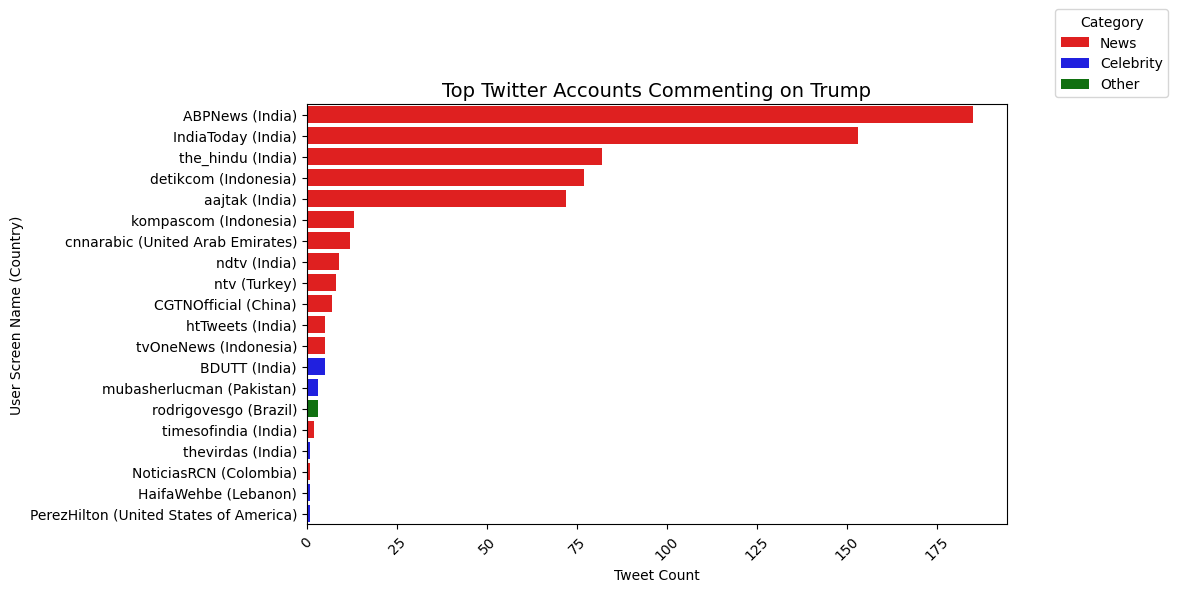

       user_screen_name  max_followers  tweet_count                   country
1383            ABPNews     10563040.0          185                     India
28005        IndiaToday      5408702.0          153                     India
115911        the_hindu      6505290.0           82                     India
80646          detikcom     16296938.0           77                 Indonesia
69259            aajtak     11351240.0           72                     India
95392         kompascom      7863538.0           13                 Indonesia
78192         cnnarabic     12033941.0           12      United Arab Emirates
103087             ndtv     13933195.0            9                     India
104093              ntv      7491407.0            8                    Turkey
10615      CGTNOfficial     13783686.0            7                     China
88571          htTweets      7808079.0            5                     India
117953        tvOneNews      8878481.0            5             

In [66]:
# Combine user_screen_name and country into a single column for the x-axis
trump_top_users_sorted_by_tweets['user_country'] = (
    trump_top_users_sorted_by_tweets['user_screen_name'] + 
    ' (' + trump_top_users_sorted_by_tweets['country'] + ')'
)

# News providers and celebrities

news_providers = ['ABPNews', 'aajtak', 'the_hindu', 'detikcom', 'cnnarabic', 'ndtv', 
                  'kompascom', 'htTweets', 'CGTNOfficial', 'timesofindia', 'ntv', 
                  'tvOneNews', 'PDChina', 'Demokrat_TV', 'youm7', 'muyinteresante',
                  'IndiaToday', 'NoticiasRCN']

celebrities = ['BDUTT', 'PerezHilton', 'HaifaWehbe', 'thevirdas', 'mubasherlucman']


# Apply category based on user_screen_name
trump_top_users_sorted_by_tweets['category'] = trump_top_users_sorted_by_tweets['user_screen_name'].apply(
    lambda x: 'News' if x in news_providers else ('Celebrity' if x in celebrities else 'Other')
)

# Set the color palette manually for the categories
color_palette = {'News': 'red', 'Celebrity': 'blue', 'Other': 'green'}

# Create the Seaborn barplot with combined x-axis labels
plt.figure(figsize=(10, 6))
sns.barplot(x='tweet_count', y='user_country', data=trump_top_users_sorted_by_tweets, hue='category', dodge=False, palette=color_palette)

# Rotate labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Tweet Count', fontsize=10)
plt.ylabel('User Screen Name (Country)', fontsize=10)
plt.title('Top Twitter Accounts Commenting on Trump', fontsize=14)

# Position the legend on the right side
plt.legend(title='Category', loc='lower center', bbox_to_anchor=(1.15, 1))
# Adjust layout manually
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.2)

# Show the plot
plt.show()

# Display the sorted data
print(trump_top_users_sorted_by_tweets[['user_screen_name', 'max_followers', 'tweet_count', 'country']])

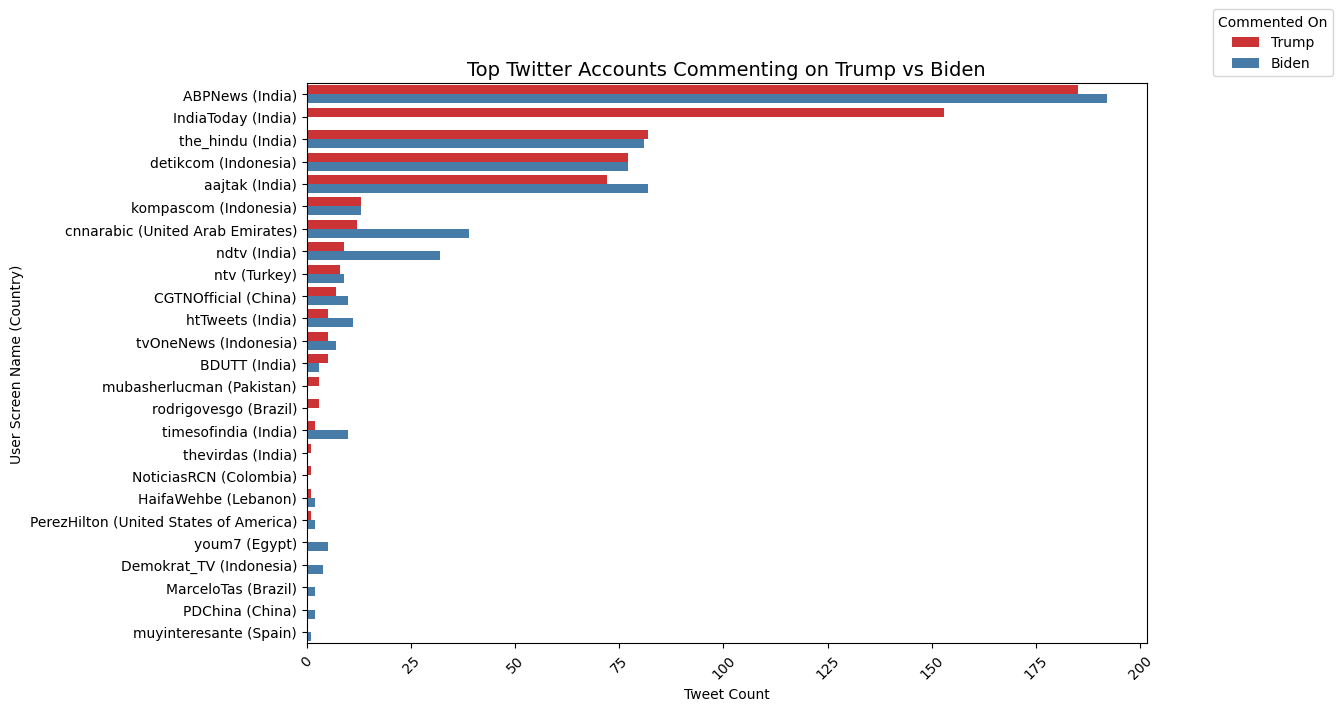

       user_screen_name  max_followers  tweet_count                   country  \
1383            ABPNews     10563040.0          185                     India   
28005        IndiaToday      5408702.0          153                     India   
115911        the_hindu      6505290.0           82                     India   
80646          detikcom     16296938.0           77                 Indonesia   
69259            aajtak     11351240.0           72                     India   
95392         kompascom      7863538.0           13                 Indonesia   
78192         cnnarabic     12033941.0           12      United Arab Emirates   
103087             ndtv     13933195.0            9                     India   
104093              ntv      7491407.0            8                    Turkey   
10615      CGTNOfficial     13783686.0            7                     China   
88571          htTweets      7808079.0            5                     India   
117953        tvOneNews     

In [67]:

# Add a column to indicate whether the tweet is about Trump or Biden
trump_top_users_sorted_by_tweets['commented_on'] = 'Trump'
biden_top_users_sorted_by_tweets['commented_on'] = 'Biden'

# Combine both datasets into one
combined_data = pd.concat([trump_top_users_sorted_by_tweets, biden_top_users_sorted_by_tweets])

# Combine user_screen_name and country into a single column for the x-axis
combined_data['user_country'] = (
    combined_data['user_screen_name'] + ' (' + combined_data['country'] + ')'
)

# Define news providers and celebrities
news_providers = ['ABPNews', 'aajtak', 'the_hindu', 'detikcom', 'cnnarabic', 'ndtv', 
                  'kompascom', 'htTweets', 'CGTNOfficial', 'timesofindia', 'ntv', 
                  'tvOneNews', 'PDChina', 'Demokrat_TV', 'youm7', 'muyinteresante',
                  'IndiaToday', 'NoticiasRCN']

celebrities = ['BDUTT', 'PerezHilton', 'HaifaWehbe', 'thevirdas', 'mubasherlucman', 'MarceloTas']

# Apply category based on user_screen_name
combined_data['category'] = combined_data['user_screen_name'].apply(
    lambda x: 'News' if x in news_providers else ('Celebrity' if x in celebrities else 'Other')
)

# Set the color palette manually for the categories
color_palette = {'News': 'red', 'Celebrity': 'blue', 'Other': 'green'}

# Create the Seaborn barplot with combined x-axis labels and include 'commented_on' as hue
plt.figure(figsize=(12, 8))
sns.barplot(x='tweet_count', y='user_country', data=combined_data, hue='commented_on', dodge=True, palette='Set1')

# Rotate labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Tweet Count', fontsize=10)
plt.ylabel('User Screen Name (Country)', fontsize=10)
plt.title('Top Twitter Accounts Commenting on Trump vs Biden', fontsize=14)

# Position the legend on the right side
plt.legend(title='Commented On', loc='lower center', bbox_to_anchor=(1.15, 1))

# Adjust layout manually
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.2)

# Show the plot
plt.show()

# Display the combined sorted data
print(combined_data[['user_screen_name', 'max_followers', 'tweet_count', 'country', 'commented_on']])


In [68]:
#Importing new libraries 
import emoji
import re
from bs4 import BeautifulSoup


In [69]:
def extract_emojis(text):
    return ''.join(c for c in text if emoji.is_emoji(c))

In [70]:
df_joebiden['emojis'] = df_joebiden['tweet'].apply(extract_emojis)
df_joebiden['emojis'].unique()

array(['⬇⬇⬇🌐', '', '😳🙆🏽♂🤷🏽♂🤦🏽♂', ..., '👎👎⚠🤮😡', '🙏🙌🤩🤩', '✊🏿👏🏿👏🏿👏🏿👏🏿👏🏿👏🏿'],
      dtype=object)

In [71]:
df_donaldtrump['emojis'] = df_donaldtrump['tweet'].apply(extract_emojis)
df_donaldtrump['emojis'].unique()

array(['⬇⬇⬇🌐', '', '🤪🍔🍔🍔🎃😩', ..., '🤣🤣😂😂😂🤪🤪', '😶🤣', '📚👏'], dtype=object)

In [72]:
#Country column mapping

country_mapping = {
    'United States of America': 'USA',
    'United States': 'USA',
    'Netherlands': 'Netherlands',
    'The Netherlands': 'Netherlands'
}

df_joebiden['country'] = df_joebiden['country'].replace(country_mapping)
df_donaldtrump['country'] = df_donaldtrump['country'].replace(country_mapping)



In [73]:
# Function for text cleaning
def normalize_and_clean_tweet_text(text):
    # Step 1: Replace special whitespace characters
    text = re.sub(r'\s+', ' ', text).strip()  # Replace multiple spaces with a single space

    # Step 2: Remove hyperlinks
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Step 3: Remove mentions (e.g., @username)
    text = re.sub(r'@\w+', '', text)  # Remove mentions

    # Step 4: Remove hashtags (e.g., #hashtag)
    text = re.sub(r'#\w+', '', text)  # Remove hashtags

    # Step 5: Drop emojis and non-ASCII characters
    text = text.encode('ascii', 'ignore').decode('ascii')

    # Step 6: Convert text to lowercase
    text = text.lower()
    
    return text

In [74]:
# Apply the cleaning function to df_donaldtrump['tweet'] and df_joebiden['tweet']
df_donaldtrump['cleaned_tweet'] = df_donaldtrump['tweet'].apply(normalize_and_clean_tweet_text)
df_joebiden['cleaned_tweet'] = df_joebiden['tweet'].apply(normalize_and_clean_tweet_text)

In [75]:
df_joebiden['cleaned_tweet'].sample(20)

158074    politicians like  &amp; others started foreign...
568094    lections us: les avocats (qq soit le camp) rep...
522761    -herausforderer joe  bereitet sich berichten z...
447401    its trumps own fault he lost the election, he ...
155843    black trump &amp; joe biden last presidential ...
618551    okay 2020 was so freakin trash but lets not fo...
304243      was   while the   was on. he bombed the  so ...
486658        : dpouillement presque termin  : 49,5%  49.2%
374004    guten morgen! der  ist vorbei, doch d. duell  ...
470320    peter brookes on       - political cartoon gal...
714171                                 hey joe congrats    
381406                                               !  |  
5561       now do s earnings from china.  emails reveal ...
46120     i saw whatchamacallit trending and thought   w...
62581     why are people still going to vote for trump? ...
97210      key tenet of  economic policy platform could ...
418295    campaa de joe biden asegura qu

In [76]:
#Language detection process
input_text_biden = df_joebiden['cleaned_tweet']
input_text_trump = df_donaldtrump['cleaned_tweet']

In [77]:
# STEP 1: Import the necessary modules.
from mediapipe.tasks import python
from mediapipe.tasks.python import text

In [78]:
import urllib.request

url = "https://storage.googleapis.com/mediapipe-models/language_detector/language_detector/float32/latest/language_detector.tflite"
output_path = "detector.tflite"

urllib.request.urlretrieve(url, output_path)
print("Model downloaded successfully!")


Model downloaded successfully!


In [79]:
# STEP 2: Create a LanguageDetector object.
base_options = python.BaseOptions(model_asset_path="detector.tflite")
options = text.LanguageDetectorOptions(base_options=base_options)
detector = text.LanguageDetector.create_from_options(options)

In [80]:
# List to store detected languages
detected_languages = []

# Loop through Joe Biden's cleaned tweets to detect languages
for tweet in input_text_biden:
    detection_result = detector.detect(tweet)
    
    if detection_result.detections:
        most_probable_detection = detection_result.detections[0]
        detected_languages.append(most_probable_detection.language_code)
    else:
        detected_languages.append('unknown')  # Append 'unknown' if no detection

# Ensure the lengths match between detected_languages and df_joebiden
if len(detected_languages) == len(df_joebiden):
    df_joebiden['detected_language'] = detected_languages
else:
    print(f"Length of detected languages ({len(detected_languages)}) doesn't match DataFrame rows ({len(df_joebiden)}).")
    # Optionally handle this situation (e.g., fill missing rows with 'unknown')
    while len(detected_languages) < len(df_joebiden):
        detected_languages.append('unknown')  # Fill missing with 'unknown'
    df_joebiden['detected_language'] = detected_languages

# Inspect the first few rows with detected languages
print(df_joebiden[['cleaned_tweet', 'detected_language']].head())


C:\Users\iurch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


                                        cleaned_tweet detected_language
0    | en :  dice que  solo se preocupa por l mism...                es
2                         this is how  made his !  !                 en
4                                                                    am
6   in 2020,  is being   by twitter to manipulate ...                en
11  fbi allegedly obtained hunter biden computer, ...           unknown


In [81]:
# List to store detected languages
detected_languages = []

# Loop through Trump cleaned tweets to detect languages
for tweet in input_text_trump:
    detection_result = detector.detect(tweet)
    
    if detection_result.detections:
        most_probable_detection = detection_result.detections[0]
        detected_languages.append(most_probable_detection.language_code)
    else:
        detected_languages.append('unknown')  # Append 'unknown' if no detection

# Ensure the lengths match between detected_languages and df_joebiden
if len(detected_languages) == len(df_donaldtrump):
    df_donaldtrump['detected_language'] = detected_languages
else:
    print(f"Length of detected languages ({len(detected_languages)}) doesn't match DataFrame rows ({len(df_donaldtrump)}).")
    # Optionally handle this situation (e.g., fill missing rows with 'unknown')
    while len(detected_languages) < len(df_donaldtrump):
        detected_languages.append('unknown')  # Fill missing with 'unknown'
    df_donaldtrump['detected_language'] = detected_languages

# Inspect the first few rows with detected languages
print(df_donaldtrump[['cleaned_tweet', 'detected_language']].head())


C:\Users\iurch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


                                       cleaned_tweet detected_language
0   | en :  dice que  solo se preocupa por l mism...                es
2  : as a student i used to hear for years, for t...                en
4       you get a tie! and you get a tie!  s rally                  en
5   her 15 minutes were over long time ago. omaro...                en
7     there wont be many of them. unless you all ...                en


In [82]:
prime_tweet_languages_biden = df_joebiden['detected_language'].value_counts(normalize=True)*100
prime_tweet_languages_biden

detected_language
en         70.696062
es          5.668355
unknown     3.836432
fr          3.482729
km          3.362174
             ...    
ga          0.000853
mg          0.000284
my          0.000284
sr          0.000284
lo          0.000284
Name: proportion, Length: 78, dtype: float64

In [83]:
prime_tweet_languages_trump = df_donaldtrump['detected_language'].value_counts(normalize=True)*100
prime_tweet_languages_trump

detected_language
en         71.151475
es          5.662357
fr          4.012624
de          3.968349
unknown     3.135764
             ...    
lv          0.000681
yo          0.000681
my          0.000454
mg          0.000454
az          0.000227
Name: proportion, Length: 76, dtype: float64

In [84]:
#Filtering out just english tweet

english_tweets_biden = df_joebiden[df_joebiden['detected_language'] == 'en']
english_tweets_trump = df_donaldtrump[df_donaldtrump['detected_language'] == 'en']


In [85]:
# Display a few samples from each dataset to verify the filtering
print("Biden English Tweets:")
print(english_tweets_biden[['cleaned_tweet', 'detected_language']].sample(10))

Biden English Tweets:
                                            cleaned_tweet detected_language
739911    i suppose you haven't got the memo ...                         en
313812  so i know of a die hard republican that is vot...                en
543967  new tactic   trump changes name to president e...                en
28267   so basically they are employed or promised emp...                en
520750                       ..      read more at:                       en
244165   us election the market's fear of a contested ...                en
329465      i voted for  because i want to see an end to                 en
145433  the war on herd immunity - the highwire - trum...                en
601971   days to  .....trump is  till ....... i know b...                en
583164  looks like the   is finally over,  will be the...                en


In [86]:
# Display a few samples from each dataset to verify the filtering
print("\nTrump English Tweets:")
print(english_tweets_trump[['cleaned_tweet', 'detected_language']].sample(10))


Trump English Tweets:
                                            cleaned_tweet detected_language
200829  on back in america, the  david treibs a christ...                en
278878  dear  voters, which is more likely in trump's ...                en
940707   has got to go its time to end the show and ta...                en
579196  it doesnt matter whose running the circus... i...                en
254455  residents in a predominantly black neighborhoo...                en
523395                                      will win the                 en
69353   anybody else wanna see  catch covid-19 again??...                en
840912  sincere question for someone that voted for an...                en
412796  apart from the republican party, it's the rest...                en
576292  retired generals have the constitutional duty ...                en


In [87]:
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# from nltk.stem import WordNetLemmatizer

# Download NLTK stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Load spaCy models for lemmatization
nlp_en = spacy.load('en_core_web_sm')  # English

# Define stopwords for english
stopwords_en = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\iurch\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\iurch\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [88]:
# Function tokenize english tweets
def tokenized_eng_tweet(tweet):
    # Tokenize the tweet
    tokens = word_tokenize(tweet)
    return tokens
    

In [89]:
# Apply cleaning to the DataFrame for English tweets only
df_joebiden['tokenized_eng_tweet'] = df_joebiden[df_joebiden['detected_language'] == 'en']['cleaned_tweet'].apply(tokenized_eng_tweet)
# Inspect the new column with cleaned, tokenized, and lemmatized English tweets
print(df_joebiden[['cleaned_tweet', 'tokenized_eng_tweet']].sample(10))

                                            cleaned_tweet  \
534390    vai dar  e depois chutaremos o miliciano. ma...   
461330  : the georgia secretary of state says there ar...   
433450  finding? acting like an imbecile as usual!! so...   
773069   expresidente george w. bush felicita a  por s...   
153290  if you thought obamacare was bad wait until yo...   
594328                                  $5 mask dm me       
85248                     cool. endorses  for president.    
423453  wi election commission basically calls the sta...   
184697  etenergyworld | russians who pose threat to us...   
178690  lol the last time i was downtown, i got tear g...   

                                      tokenized_eng_tweet  
534390                                                NaN  
461330  [:, the, georgia, secretary, of, state, says, ...  
433450  [finding, ?, acting, like, an, imbecile, as, u...  
773069                                                NaN  
153290  [if, you, thought, o

In [90]:
df_donaldtrump['tokenized_eng_tweet'] = df_donaldtrump[df_donaldtrump['detected_language'] == 'en']['cleaned_tweet'].apply(tokenized_eng_tweet)
# Inspect the new column with cleaned, tokenized, and lemmatized English tweets
print(df_donaldtrump[['cleaned_tweet', 'tokenized_eng_tweet']].sample(10))

                                            cleaned_tweet  \
139106  i have to say the  supporters were right. we'r...   
274214   watch 's broadcast: join  write in candidates...   
56733                          joe biden is done!           
766798     un son de cloche (enfin) un peu diffrent !       
2466    at some point, everyone will be asking why the...   
741698  nevada do be that bitch that celebrates her bi...   
318737  not rounding the bend on  claim simply isnt tr...   
525816                                    remport par  !!   
800501  en arizona, les partisans de donald trump ne c...   
255464  so what if  called you george the monkey ... w...   

                                      tokenized_eng_tweet  
139106  [i, have, to, say, the, supporters, were, righ...  
274214  [watch, 's, broadcast, :, join, write, in, can...  
56733                                                 NaN  
766798                                                NaN  
2466    [at, some, point, ,,

In [91]:
#Step 2. Removing stop words function + removing of NaNs and punctuation still in tweets 
def remove_stopwords(tokens):
    # Check if the input is a valid list (not NaN)
    if not isinstance(tokens, list):
        return []  # Return an empty list if the tokens are not a list (NaN)
    
    # Filter out stopwords, punctuation, and non-alphabetic tokens
    cleaned_tokens = [word for word in tokens if word.lower() not in stopwords_en and word.isalpha()]
    
    return cleaned_tokens



In [92]:
# Applying the stopwords function
df_joebiden.loc[:, 'tokenized_eng_tweet_biden'] = df_joebiden['tokenized_eng_tweet'].apply(remove_stopwords)

# Drop rows where the cleaned token list is empty
df_joebiden = df_joebiden[df_joebiden['tokenized_eng_tweet_biden'].str.len() > 0]

# output
print(df_joebiden[['tokenized_eng_tweet', 'tokenized_eng_tweet_biden']].sample(10))

                                      tokenized_eng_tweet  \
664950    [flicitations, now, lets, try, to, a, few, and]   
200789  [is, very, dangerous, and, it, will, get, wors...   
712039        [to, the, bbc, ....., '', i, am, irish, '']   
126962  [trump, calls, new, york, 'ghost, town, ', dur...   
265487  [i, listened, ,, say, hi, to, your, little, gu...   
67277   [mostly, all, right-wing, ruling, countries, &...   
148679  [number, one, :, that, is, none, of, your, bus...   
311833  [forget, about, what, wants, for, the, let, 's...   
45807   [says, the, guy, who, put, the, health, and, s...   
637581  [is, gon, na, be, president, defeating, in, 59...   

                                tokenized_eng_tweet_biden  
664950                          [flicitations, lets, try]  
200789  [dangerous, get, worse, think, think, winning,...  
712039                                       [bbc, irish]  
126962  [trump, calls, new, york, town, presidential, ...  
265487                   [li

In [93]:
# Applying the stopwords function on Donald Trump Data
df_donaldtrump.loc[:, 'tokenized_eng_tweet_trump'] = df_donaldtrump['tokenized_eng_tweet'].apply(remove_stopwords)

# Drop rows where the cleaned token list is empty
df_donaldtrump = df_donaldtrump[df_donaldtrump['tokenized_eng_tweet_trump'].str.len() > 0]

# output
print(df_donaldtrump[['tokenized_eng_tweet', 'tokenized_eng_tweet_trump']].sample(10))

                                      tokenized_eng_tweet  \
111456  [attacks, bec, are, his, enemy, reminds, me, o...   
942475  [supposedly, colluded, with, in, 2016, did, no...   
881596                               [you, 're, fired, !]   
311276  [i, do, n't, think, i, 've, ever, seen, so, ma...   
964994  [i, recall, so, many, bragging, they, prayed, ...   
774389  [is, calling, on, and, to, assign, the, to, de...   
228022                                    [mr, president]   
845505  [is, president, elect, ., chaos, reign, of, is...   
805648                                   [the, real, ...]   
156587  [here, are, all, of, the, ways, sabotaged, his...   

                                tokenized_eng_tweet_trump  
111456                     [attacks, bec, enemy, reminds]  
942475  [supposedly, colluded, collude, insane, americ...  
881596                                            [fired]  
311276  [think, ever, seen, many, turn, away, supporti...  
964994  [recall, many, bragg

In [94]:
#Function for Lemmatization of english tweets ()
def lemmatize_tokens(tokens):
    # Is an input a valid list (not NaN)
    if not isinstance(tokens, list):
        return []
    
    # Join tokens into a single string and process through spaCy
    doc = nlp_en(" ".join(tokens))
    # Lemmatize tokens while ensuring only alphabetic words are retained
    lemmatized_tokens = [token.lemma_ for token in doc if token.is_alpha]
    
    return lemmatized_tokens


In [95]:
# Apply lemmatization to the tokenized tweets
df_joebiden['lemmatized_eng_tweet_b'] = df_joebiden['tokenized_eng_tweet_biden'].apply(lemmatize_tokens)

# Check the output
print(df_joebiden[['tokenized_eng_tweet_biden', 'lemmatized_eng_tweet_b']].sample(10))


                                tokenized_eng_tweet_biden  \
201408  [rudy, giuliani, hints, another, biden, bombsh...   
101946  [think, trump, hits, joe, questions, hunter, l...   
355519  [imagine, biden, voters, cast, vote, trump, bi...   
522214                                             [seen]   
15019                             [got, ta, catch, uncle]   
279038  [fun, video, catches, inciting, supporters, ha...   
519846  [trump, supporters, wake, find, took, lead, ge...   
120483                               [built, cages, deny]   
362961  [us, president, wins, south, dakota, north, da...   
235673  [hold, accountable, trump, says, wants, tax, p...   

                                   lemmatized_eng_tweet_b  
201408  [rudy, giuliani, hint, another, biden, bombshe...  
101946  [think, trump, hit, joe, questions, hunter, la...  
355519  [imagine, biden, voter, cast, vote, trump, biden]  
522214                                              [see]  
15019                       

In [96]:
# Apply lemmatization to the tokenized tweets
df_donaldtrump['lemmatized_eng_tweet_trump'] = df_donaldtrump['tokenized_eng_tweet_trump'].apply(lemmatize_tokens)

# Check the output
print(df_donaldtrump[['tokenized_eng_tweet_trump', 'lemmatized_eng_tweet_trump']].sample(10))

                                tokenized_eng_tweet_trump  \
109553                 [america, primed, ready, election]   
502523  [come, enough, defeat, needs, beaten, badly, p...   
786185  [playing, modern, warfare, many, times, think,...   
474254                         [left, go, nuts, bus, via]   
156297                          [pretty, good, odds, lol]   
241107  [everyone, wearing, masks, trump, played, mast...   
606333  [trump, still, needs, future, america, depends...   
192269  [minutes, debate, turned, minutes, clearly, fo...   
425462                  [state, ags, file, suit, session]   
125822                             [heard, bank, account]   

                               lemmatized_eng_tweet_trump  
109553                  [america, prime, ready, election]  
502523  [come, enough, defeat, need, beat, badly, pret...  
786185  [play, modern, warfare, many, time, think, wou...  
474254                        [leave, go, nuts, bus, via]  
156297                      

Text Representation:

Vectorization: Convert the tokens into numerical format for modeling (Mashine Learning) with methods: TF-IDF, or word embeddings (like Word2Vec - capturing semantic relationships between wordsor GloVe). It will quantify the importance of words and phrases in your analysis or model


Modeling: build machine learning models, conduct sentiment analysis (positive/negative), or perform topic modeling.

Analysis: After vectorization, analyze the cleaned tweets to gain insights or visualize the data.

In [97]:
df_joebiden.head()

,created_at,tweet,retweet_count,user_screen_name,user_join_date,user_location,country,continent,state,state_code,...,user_id,user_followers_count,lat,long,emojis,cleaned_tweet,detected_language,tokenized_eng_tweet,tokenized_eng_tweet_biden,lemmatized_eng_tweet_b
2,2020-10-15 00:00:20,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,Flag_Wavers,2015-08-30 19:38:21,Golden Valley Arizona,USA,North America,Montana,MT,...,3494182277,1536.0,46.304036,-109.171431,,this is how made his ! !,en,"[this, is, how, made, his, !, !]",[made],[make]
6,2020-10-15 00:00:25,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,changeillinois,2009-02-02 23:08:28,"Chicago, Illinois",USA,North America,Illinois,IL,...,19940334,1397.0,41.875562,-87.624421,,"in 2020, is being by twitter to manipulate ...",en,"[in, 2020, ,, is, being, by, twitter, to, mani...","[twitter, manipulate, us, election, favor, ccp...","[twitter, manipulate, us, election, favor, ccp..."
17,2020-10-15 00:01:23,"Comments on this? ""Do Democrats Understand how...",0.0,ubaldireports,2010-01-04 04:34:39,"Tampa, Florida",USA,North America,Florida,FL,...,101659277,83.0,27.947760,-82.458444,,"comments on this? ""do democrats understand how...",en,"[comments, on, this, ?, ``, do, democrats, und...","[comments, democrats, understand, ruthless, ch...","[comment, democrat, understand, ruthless, china]"
21,2020-10-15 00:01:42,In an effort to find the truth about allegatio...,0.0,_dbrown_23,2019-08-24 04:25:30,"Champaign, IL",USA,North America,Illinois,IL,...,1165117868150796288,954.0,40.116420,-88.243383,,in an effort to find the truth about allegatio...,en,"[in, an, effort, to, find, the, truth, about, ...","[effort, find, truth, allegations, allowing, p...","[effort, find, truth, allegation, allow, peopl..."
22,2020-10-15 00:01:47,Twitter is doing everything they can to help D...,0.0,Joelwhct,2019-06-15 18:24:44,"Hollywood, FL",USA,North America,California,CA,...,1139961955861651584,2.0,34.098003,-118.329523,,twitter is doing everything they can to help d...,en,"[twitter, is, doing, everything, they, can, to...","[twitter, everything, help, democrats, win, el...","[twitter, everything, help, democrats, win, el..."


In [98]:
df_donaldtrump.head()

,created_at,tweet,retweet_count,user_screen_name,user_join_date,user_location,country,continent,state,state_code,...,user_id,user_followers_count,lat,long,emojis,cleaned_tweet,detected_language,tokenized_eng_tweet,tokenized_eng_tweet_trump,lemmatized_eng_tweet_trump
2,2020-10-15 00:00:02,"#Trump: As a student I used to hear for years,...",1.0,snarke,2007-08-26 05:56:11,Portland,USA,North America,Oregon,OR,...,8436472,1185.0,45.520247,-122.674195,,": as a student i used to hear for years, for t...",en,"[:, as, a, student, i, used, to, hear, for, ye...","[student, used, hear, years, ten, years, heard...","[student, use, hear, year, ten, year, hear, ch..."
4,2020-10-15 00:00:08,You get a tie! And you get a tie! #Trump ‘s ra...,3.0,Ranaabtar,2009-06-15 19:05:35,Washington DC,USA,North America,District of Columbia,DC,...,47413798,5393.0,38.894992,-77.036558,,you get a tie! and you get a tie! s rally,en,"[you, get, a, tie, !, and, you, get, a, tie, !...","[get, tie, get, tie, rally]","[get, tie, get, tie, rally]"
5,2020-10-15 00:00:17,@CLady62 Her 15 minutes were over long time ag...,0.0,FarrisFlagg,2013-02-01 01:37:38,"Perris,California",USA,North America,California,CA,...,1138416104,2363.0,33.782519,-117.228648,,her 15 minutes were over long time ago. omaro...,en,"[her, 15, minutes, were, over, long, time, ago...","[minutes, long, time, ago, omarosa, never, rep...","[minute, long, time, ago, omarosa, never, repr..."
7,2020-10-15 00:00:18,@DeeviousDenise @realDonaldTrump @nypost There...,0.0,sm_gulledge,2017-08-24 16:45:49,"Ohio, USA",USA,North America,Ohio,OH,...,900761071631429632,766.0,40.225357,-82.688140,,there wont be many of them. unless you all ...,en,"[there, wont, be, many, of, them, ., unless, y...","[wont, many, unless, voting, god, prevails, bo...","[will, not, many, unless, vote, god, prevail, ..."
8,2020-10-15 00:00:20,One of the single most effective remedies to e...,0.0,jamieo33,2012-03-30 00:30:54,"Pennsylvania, USA",USA,North America,Pennsylvania,PA,...,540476889,151.0,40.969989,-77.727883,,one of the single most effective remedies to e...,en,"[one, of, the, single, most, effective, remedi...","[one, single, effective, remedies, eradicate, ...","[one, single, effective, remedy, eradicate, an..."


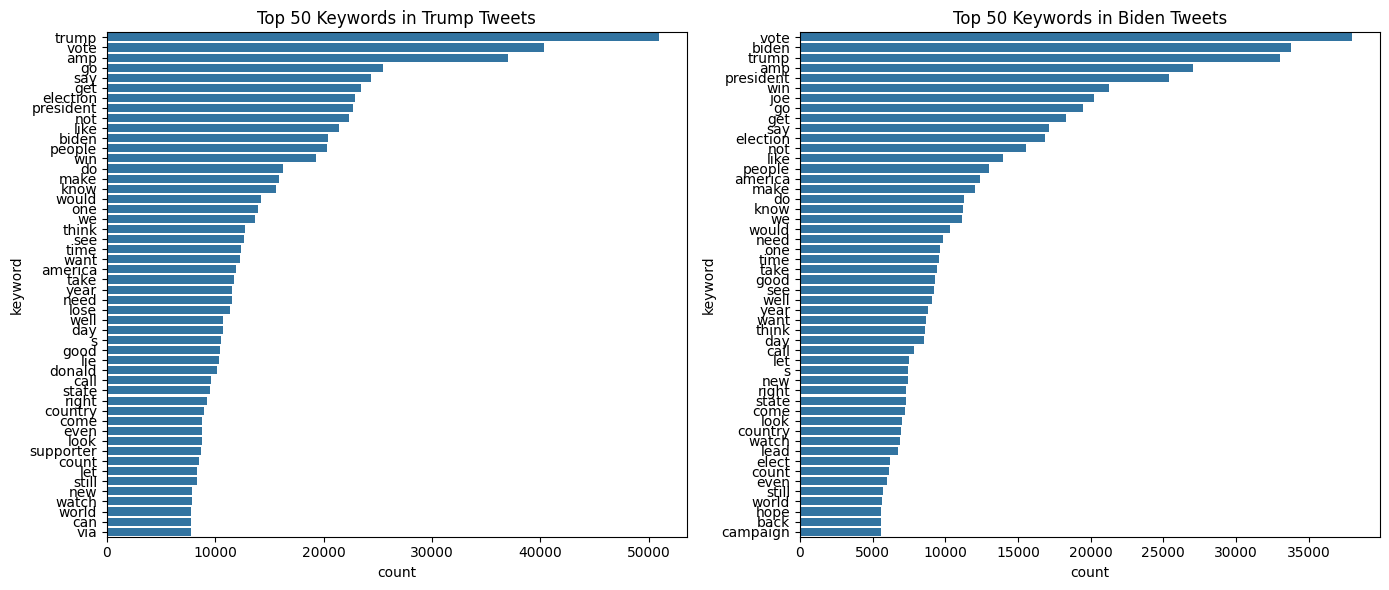

In [102]:
#Keywords Biden vs Trump count and plot
from collections import Counter

# Flatten the lists of tokens into a single list 
tweets_astokens_trump = [token for tokens in df_donaldtrump['lemmatized_eng_tweet_trump'] for token in tokens]
tweets_astokens_biden = [token for tokens in df_joebiden['lemmatized_eng_tweet_b'] for token in tokens]

# Count the frequency of each token
counts_tweets_astokens_biden = Counter(tweets_astokens_biden)
counts_tweets_astokens_trump = Counter(tweets_astokens_trump)

# Get the top 100 most common keywords for each
top_trump = counts_tweets_astokens_trump.most_common(50)
top_biden = counts_tweets_astokens_biden.most_common(50)

# Convert the counts into DataFrames for visualization
df_trump_top_words = pd.DataFrame(top_trump, columns=['keyword', 'count'])
df_biden_top_words = pd.DataFrame(top_biden, columns=['keyword', 'count'])

# Plotting with seaborn
fig, axes = plt.subplots(1, 2, figsize=(14, 6), dpi=100)

# Plot Trump Keywords
sns.barplot(data=df_trump_top_words, x='count', y='keyword', ax=axes[0])
axes[0].set_title('Top 50 Keywords in Trump Tweets')

# Plot Biden Keywords
sns.barplot(data=df_biden_top_words, x='count', y='keyword', ax=axes[1])
axes[1].set_title('Top 50 Keywords in Biden Tweets')

plt.tight_layout()
plt.show()

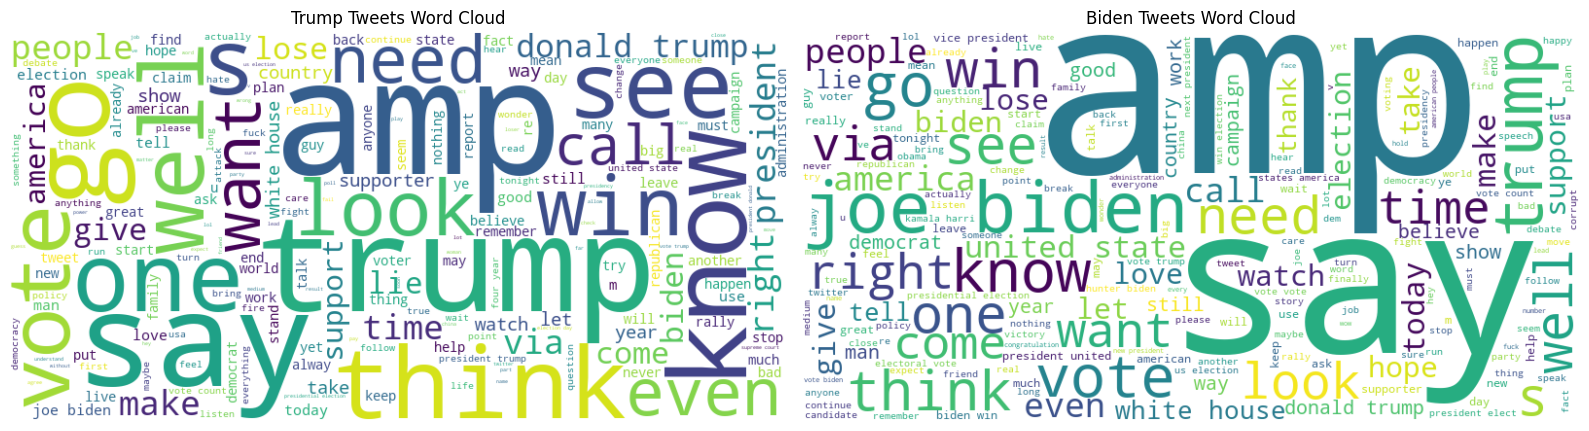

In [103]:
#Show the top words in cloud

from wordcloud import WordCloud
# Flatten the lists of tokens (as previously done)
all_tokens_trump = [token for tokens in df_donaldtrump['lemmatized_eng_tweet_trump'] for token in tokens]
all_tokens_biden = [token for tokens in df_joebiden['lemmatized_eng_tweet_b'] for token in tokens]

# Combine all the words into a single string for each
trump_text = ' '.join(all_tokens_trump)
biden_text = ' '.join(all_tokens_biden)

# Generate the WordCloud for Trump tweets
wordcloud_trump = WordCloud(width=800, height=400, background_color='white').generate(trump_text)

# Generate the WordCloud for Biden tweets
wordcloud_biden = WordCloud(width=800, height=400, background_color='white').generate(biden_text)

# Plot the WordClouds
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Trump Word Cloud
axes[0].imshow(wordcloud_trump, interpolation='bilinear')
axes[0].axis('off')  # Turn off axis
axes[0].set_title('Trump Tweets Word Cloud')

# Biden Word Cloud
axes[1].imshow(wordcloud_biden, interpolation='bilinear')
axes[1].axis('off')  # Turn off axis
axes[1].set_title('Biden Tweets Word Cloud')

plt.tight_layout()
plt.show()

# You can customize the word cloud appearance by adjusting parameters like max_font_size, max_words, colormap, etc.
WordCloud(width=800, height=400, background_color='white', max_words=100, colormap='Blues')



In [104]:
#Extraction of hashtags 

df_joebiden['hashtags'] = df_joebiden['tweet'].apply(lambda x: re.findall(r"#(\w+)", x))
df_donaldtrump['hashtags'] = df_donaldtrump['tweet'].apply(lambda x: re.findall(r"#(\w+)", x))
# Display the DataFrame with extracted hashtags
print(df_joebiden[['tweet', 'hashtags']])

                                                    tweet  \
2       @IslandGirlPRV @BradBeauregardJ @MeidasTouch T...   
6       In 2020, #NYPost is being #censorship #CENSORE...   
17      Comments on this? "Do Democrats Understand how...   
21      In an effort to find the truth about allegatio...   
22      Twitter is doing everything they can to help D...   
...                                                   ...   
777054   #Nationals invite #Biden https://t.co/UVEs3CB6mM   
777057  The man needs some help...#usa #biden\nWhen wi...   
777059  LIONZ DEN PRESENTS TO YOU \n\n“THE WHITE OBAMA...   
777063  Mr. #Biden, tear down that wall (with #Mexico)...   
777068  Stop laying @CNN !\n#Paris and #London dont gi...   

                                                 hashtags  
2                              [Biden, TrumpIsNotAmerica]  
6       [NYPost, censorship, CENSORED, JoeBiden, Trump...  
17      [China, HunterBiden, JoeBiden, BidenHarris, Bi...  
21             [NYPost, Hun

In [105]:
# Display the DataFrame with extracted hashtags
print(df_donaldtrump[['tweet', 'hashtags']])

                                                    tweet  \
2       #Trump: As a student I used to hear for years,...   
4       You get a tie! And you get a tie! #Trump ‘s ra...   
5       @CLady62 Her 15 minutes were over long time ag...   
7       @DeeviousDenise @realDonaldTrump @nypost There...   
8       One of the single most effective remedies to e...   
...                                                   ...   
971065  LIONZ DEN PRESENTS TO YOU \n\n“THE WHITE OBAMA...   
971073  Again with the lying, cheating, b.s. #LoserTru...   
971075  Donald Trump, Moscow, 1996, shared by @oooroma...   
971078  13 emails from #Trump and Trumpettes today. 20...   
971080  Stop laying @CNN !\n#Paris and #London dont gi...   

                                                 hashtags  
2                                                 [Trump]  
4                                           [Trump, Iowa]  
5                                     [TheReidOut, Trump]  
7                          

1) Vectorize the tweets using TF-IDF to emphasize important words

2) Classify Sentiment: Use a sentiment analysis model to classify tweets as positive, negative, or neutral (VADER or BERT)

3) Apply topic modeling (LDA) to extract themes.
Generate Word Clouds:

4) For general word frequency using TF-IDF.
Separate word clouds for positive and negative tweets

In [108]:
#Time to vectorize tweets and look insight to unique but weightfull words in tweets
#TF-IDF 
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming each tweet in 'texts_biden' is a list of lemmatized tokens
tweet_biden = [" ".join(tokens) for tokens in df_joebiden["lemmatized_eng_tweet_b"].tolist()]

# Initialize the vectorizer
vectorizer = TfidfVectorizer(max_features=100)  # Limit to top 100 words if desired

# Fit and transform the texts to generate the TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(tweet_biden)

# Get the vocabulary (words) and their TF-IDF scores
vocab = vectorizer.get_feature_names_out()
print(vocab)  # This prints the vocabulary (top words by importance)

# To get the actual TF-IDF scores:
tfidf_scores = tfidf_matrix.toarray()
print(tfidf_scores)  # Prints the TF-IDF scores for each word in each document (tweet)



['america' 'american' 'americans' 'amp' 'back' 'ballot' 'biden' 'big'
 'call' 'campaign' 'can' 'come' 'congratulation' 'could' 'count' 'country'
 'day' 'do' 'donald' 'elect' 'election' 'end' 'even' 'every' 'family'
 'first' 'get' 'give' 'go' 'good' 'great' 'hope' 'house' 'hunter' 'joe'
 'keep' 'know' 'last' 'lead' 'let' 'lie' 'like' 'live' 'look' 'lose'
 'love' 'make' 'man' 'many' 'much' 'need' 'never' 'new' 'news' 'next'
 'not' 'one' 'people' 'plan' 'please' 'president' 'presidential' 'really'
 'right' 'run' 'say' 'see' 'show' 'state' 'states' 'still' 'stop'
 'support' 'supporter' 'take' 'tell' 'thank' 'thing' 'think' 'time'
 'today' 'trump' 'try' 'united' 'us' 'via' 'victory' 'vote' 'voter' 'want'
 'watch' 'way' 'we' 'well' 'white' 'win' 'work' 'world' 'would' 'year']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


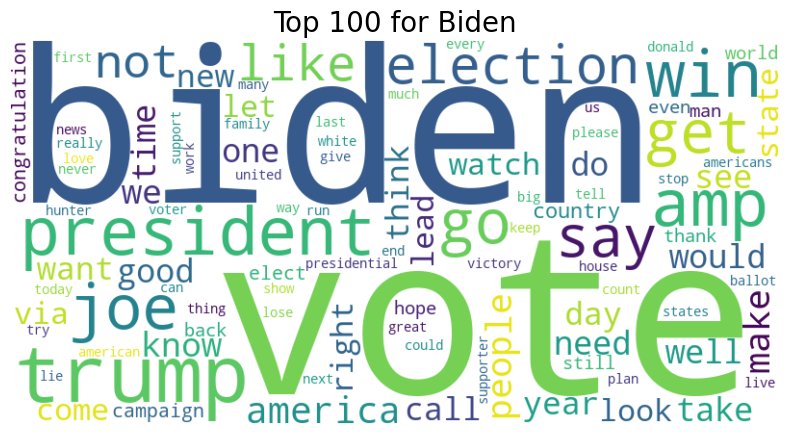

In [109]:
#Just to compare the results of before TFIDF and after. Wordcloud
words = vocab  # words from TfidfVectorizer
scores = tfidf_matrix.sum(axis=0).A1  # Sum TF-IDF scores across all documents

# Create a dictionary of words and their corresponding scores
word_score_dict = dict(zip(words, scores))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_score_dict)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Add title
plt.title("Top 100 for Biden", fontsize=20)
plt.show()

In [110]:
#Trump Dataset
# Assuming each tweet in 'texts_biden' is a list of lemmatized tokens
tweet_trump = [" ".join(tokens) for tokens in df_donaldtrump["lemmatized_eng_tweet_trump"].tolist()]

vectorizer = TfidfVectorizer(max_features=100)  # Limit to top 100 words if desired
tfidf_matrix = vectorizer.fit_transform(tweet_trump)
vocab = vectorizer.get_feature_names_out()
print(vocab)  # (top words by importance)

# To get the actual TF-IDF scores:
tfidf_scores = tfidf_matrix.toarray()
print(tfidf_scores)  # Prints the TF-IDF scores for each word in each document (tweet)



['america' 'american' 'americans' 'amp' 'back' 'bad' 'ballot' 'believe'
 'biden' 'big' 'call' 'campaign' 'can' 'care' 'claim' 'come' 'could'
 'count' 'country' 'day' 'do' 'donald' 'election' 'end' 'even' 'ever'
 'every' 'get' 'give' 'go' 'good' 'great' 'he' 'help' 'hope' 'house' 'joe'
 'keep' 'know' 'last' 'lead' 'leave' 'let' 'lie' 'like' 'live' 'look'
 'lose' 'love' 'make' 'man' 'many' 'million' 'much' 'need' 'never' 'new'
 'news' 'not' 'one' 'people' 'plan' 'please' 'president' 'rally' 'really'
 'right' 'say' 'see' 'show' 'state' 'still' 'stop' 'support' 'supporter'
 'take' 'talk' 'tell' 'thing' 'think' 'time' 'today' 'trump' 'try' 'us'
 'use' 'via' 'vote' 'voter' 'want' 'watch' 'way' 'we' 'well' 'white' 'win'
 'work' 'world' 'would' 'year']
[[0.        0.        0.        ... 0.        0.        0.4351452]
 [0.        0.        0.        ... 0.        0.        0.       ]
 [0.        0.        0.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 0. 

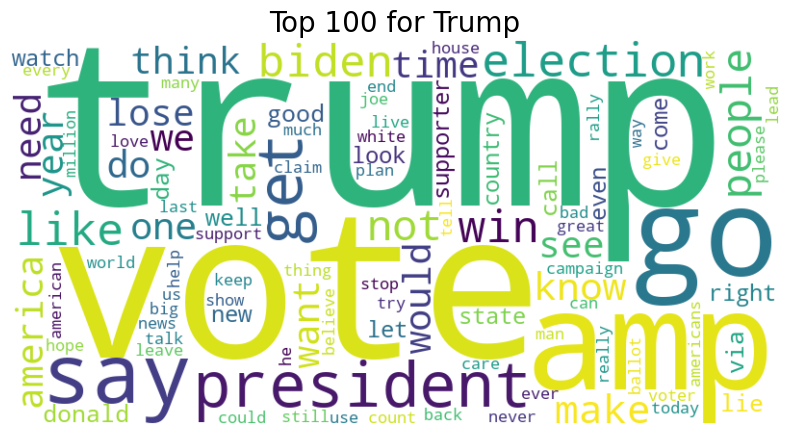

In [111]:
words = vocab  # words from TfidfVectorizer
scores = tfidf_matrix.sum(axis=0).A1  # Sum TF-IDF scores across all documents

# Create a dictionary of words and their corresponding scores
word_score_dict = dict(zip(words, scores))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_score_dict)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Add title
plt.title("Top 100 for Trump", fontsize=20)
plt.show()

In [117]:
import torch

# Check if CUDA is available (indicating a GPU is present)
if torch.cuda.is_available():
    print(f"GPU is available: {torch.cuda.get_device_name(0)}")
    print(f"Total GPU memory: {torch.cuda.get_device_properties(0).total_memory / (1024 ** 2):.2f} MB")
else:
    print("GPU is not available, using CPU.")


GPU is not available, using CPU.


In [ ]:
#Classification Model -  a sentiment analysis model to classify tweets as positive, negative, or neutral (VADER or BERT)
from transformers import pipeline

# Initialize a pre-trained BERT model for sentiment analysis
classifier = pipeline('sentiment-analysis', model='distilbert/distilbert-base-uncased-finetuned-sst-2-english')

# Function to classify sentiment using BERT
def analyze_sentiment_bert_batch(tweets):
    results = classifier(tweets)  # Process the list of tweets in one go
    sentiments = []
    scores = []
    for result in results:
        label = result['label'].lower()  # Convert label to lowercase
        score = result['score']  # Get the confidence score
        sentiments.append(label)
        scores.append(score)
    return sentiments, scores

# Apply sentiment analysis to the tweets in batches
df_joebiden['sentiment'], df_joebiden['score'] = analyze_sentiment_bert_batch(
    df_joebiden['lemmatized_eng_tweet_b'].apply(lambda tokens: " ".join(tokens)).tolist()
)

# Check results
print(df_joebiden[['lemmatized_eng_tweet_b', 'sentiment', 'score']].head())

In [ ]:
# Apply sentiment analysis to the Trump tweets
df_donaldtrump['sentiment'] = df_donaldtrump['lemmatized_eng_tweet_trump'].apply(lambda tokens: analyze_sentiment_bert(" ".join(tokens)))

# Check results
print(df_joebiden[['lemmatized_eng_tweet_trump', 'sentiment']].head())

In [ ]:
#Cloud of positive sentiments Trump vs Biden

In [ ]:
#Cloud of negative sentivements Trump vs Biden

In [ ]:
#Hashtags & Emojies
# Count hashtags
hashtags_biden = [hashtag for sublist in df_joebiden['hashtags'] for hashtag in sublist]
hashtag_counts = Counter(hashtags_biden)

# Count emojis
emojis_biden = [emoji for sublist in df_joebiden['emojis'] for emoji in sublist]
emoji_counts = Counter(emojis_biden)

# Displaying the most common hashtags
print("Hashtag Counts:", hashtag_counts.most_common())

# Displaying the most common emojis
print("Emoji Counts:", emoji_counts.most_common())

# Plotting the most common hashtags
plt.figure(figsize=(10, 5))
plt.bar(*zip(*hashtag_counts.most_common(10)))
plt.title("Top Hashtags Biden")
plt.xlabel("Hashtags")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.show()

# Plotting the most common emojis
plt.figure(figsize=(10, 5))
plt.bar(*zip(*emoji_counts.most_common(10)))
plt.title("Top Emojis Biden")
plt.xlabel("Emojis")
plt.ylabel("Counts")
plt.show()

In [ ]:
#Trump hashtags & emojies
hashtags_trump = [hashtag for sublist in df_donaldtrump['hashtags'] for hashtag in sublist]
hashtag_counts = Counter(hashtags_trump)

# Count emojis
emojis_trump = [emoji for sublist in df_donaldtrump['emojis'] for emoji in sublist]
emoji_counts = Counter(emojis_trump)

# Displaying the most common hashtags
print("Hashtag Counts:", hashtag_counts.most_common())

# Displaying the most common emojis
print("Emoji Counts:", emoji_counts.most_common())

# Plotting the most common hashtags
plt.figure(figsize=(10, 5))
plt.bar(*zip(*hashtag_counts.most_common(10)))
plt.title("Top Hashtags Trump")
plt.xlabel("Hashtags")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.show()

# Plotting the most common emojis
plt.figure(figsize=(10, 5))
plt.bar(*zip(*emoji_counts.most_common(10)))
plt.title("Top Emojis Trump")
plt.xlabel("Emojis")
plt.ylabel("Counts")
plt.show()

In [ ]:
#Emojies distribution on the main dates
# High tweet production dates 
high_tweet_dates = ['2024-10-22', '2024-11-03', '2024-11-07']  # 

# Convert the dates to datetime
high_tweet_dates = pd.to_datetime(high_tweet_dates)

# Filter tweets for Biden on high tweet production days
biden_high_tweets = df_joebiden[df_joebiden['created_at'].dt.date.isin(high_tweet_dates)]

# Filter tweets for Trump on high tweet production days
trump_high_tweets = df_donaldtrump[df_donaldtrump['created_at'].dt.date.isin(high_tweet_dates)]


In [ ]:
# Count emojis for Biden from the 'emojis' column
biden_emojis = biden_high_tweets['emojis'].explode().dropna()  # Explode to separate emojis
biden_emoji_counts = Counter(biden_emojis)

# Count emojis for Trump from the 'emojis' column 
trump_emojis = trump_high_tweets['emojis'].explode().dropna()  # Explode to separate emojis
trump_emoji_counts = Counter(trump_emojis)

# Convert counts to DataFrames for easier visualization
biden_emoji_df = pd.DataFrame(biden_emoji_counts.items(), columns=['emoji', 'count']).sort_values(by='count', ascending=False)
trump_emoji_df = pd.DataFrame(trump_emoji_counts.items(), columns=['emoji', 'count']).sort_values(by='count', ascending=False)

# Display the emoji counts
print("Biden Emoji Counts:\n", biden_emoji_df)
print("Trump Emoji Counts:\n", trump_emoji_df)

# Plotting the emoji distribution for Biden
plt.figure(figsize=(12, 6))
plt.bar(biden_emoji_df['emoji'], biden_emoji_df['count'], color='blue')
plt.title('Emoji Distribution for Biden on High Tweet Production Days')
plt.xlabel('Emojis')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plotting the emoji distribution for Trump
plt.figure(figsize=(12, 6))
plt.bar(trump_emoji_df['emoji'], trump_emoji_df['count'], color='red')
plt.title('Emoji Distribution for Trump on High Tweet Production Days')
plt.xlabel('Emojis')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# #Onehot encoding Hashtags Biden
# from sklearn.preprocessing import MultiLabelBinarizer

# # One-hot encode hashtags
# mlb_hashtags = MultiLabelBinarizer()
# hashtags_encoded = mlb_hashtags.fit_transform(df_joebiden['hashtags'])

# # One-hot encode emojis
# mlb_emojis = MultiLabelBinarizer()
# emojis_encoded = mlb_emojis.fit_transform(df_joebiden['emojis'])

# # Convert to DataFrame
# df_biden_hashtags_encoded = pd.DataFrame(hashtags_encoded, columns=mlb_hashtags.classes_)
# df_biden_emojis_encoded = pd.DataFrame(emojis_encoded, columns=mlb_emojis.classes_)

# # Combine with original DataFrame
# df_joebiden_concat = pd.concat([df_joebiden, df_biden_hashtags_encoded, df_biden_emojis_encoded], axis=1)
# print(df_joebiden_concat)

In [ ]:
# #Onehote hashtags & emojis Trump
# # One-hot encode hashtags
# hashtags_encoded = mlb_hashtags.fit_transform(df_donaldtrump['hashtags'])

# # One-hot encode emojis
# emojis_encoded = mlb_emojis.fit_transform(df_donaldtrump['emojis'])

# # Convert to DataFrame
# df_trump_hashtags_encoded = pd.DataFrame(hashtags_encoded, columns=mlb_hashtags.classes_)
# df_trump_emojis_encoded = pd.DataFrame(emojis_encoded, columns=mlb_emojis.classes_)

# # Combine with original DataFrame
# df_donaldtrump_concat = pd.concat([df_donaldtrump, df_trump_hashtags_encoded, df_trump_emojis_encoded], axis=1)
# print(df_donaldtrump_concat)